In [6]:
%matplotlib inline


In [220]:
import geopandas
import pandas as pd
import numpy as np
import os

pd.options.display.max_rows = 1000


In [6]:
parcels_2016 = geopandas.read_file("D:\geodata\geo_export_22c0b68c-a3c1-49a2-b9ea-cae1f6befb85.shp")

In [3]:
community_parcels = geopandas.read_file("bridgeport_parcels.shp")

In [4]:
areas = geopandas.read_file("D:\geodata\geo_export_559b6b3b-8beb-4614-9af4-62a992ca6e52.shp")

In [5]:
waterways = geopandas.read_file("D:\geodata\geo_export_ca748365-1956-4d89-a0d5-2a6ea461f224.shp")

In [6]:
zoning = geopandas.read_file("D:\geodata\geo_export_0418b5e9-bd1f-4cde-a515-a8d13c771ca1.shp")

In [7]:
props = pd.read_csv("D:\geodata\Potential Chicago Properties - Sheet1.csv")

In [ ]:
# Violations 
# Historic Status  

In [332]:
permits = pd.read_csv("Building_Permits.csv", low_memory=False)

NameError: name 'GeoDataFrane' is not defined

In [335]:
permits = geopandas.GeoDataFrame(permits, crs=crs, geometry=permits["LOCATION"])

TypeError: 'GeoDataFrame' object is not callable

In [348]:
permits.sort_values("        ESTIMATED_COST", ascending=False).head(5)

ID    PERMIT#                     PERMIT_TYPE  \
179764  2146435  100331285        PERMIT - ELECTRIC WIRING   
191076  2175605  100346530  PERMIT - RENOVATION/ALTERATION   
192360  2178648  100348179  PERMIT - RENOVATION/ALTERATION   
215377  2241642  100379104  PERMIT - RENOVATION/ALTERATION   
15716   1668116  100105611  PERMIT - RENOVATION/ALTERATION   

                ISSUE_DATE          ESTIMATED_COST           AMOUNT_WAIVED  \
179764          03/08/2010            1.000000e+10                     0.0   
191076          10/06/2010            6.666667e+09                     0.0   
192360          08/23/2010            6.666667e+09                     0.0   
215377          08/18/2011            6.666667e+09                     0.0   
15716           04/06/2006            1.000000e+09                     0.0   

           AMOUNT_PAID      TOTAL_FEE  STREET_NUMBER STREET DIRECTION  \
179764          250.00         250.00           3813                S   
191076          949.64         949.64            229                E   
192360          375.00         375.00            141                W   
215377        11713.88       11713.88           8535                W   
15716           160.00         160.00           4131                W   

                          ...                    CONTRACTOR_15_TYPE  \
179764                    ...                                   NaN   
191076                    ...                                   NaN   
192360                    ...                                   NaN   
215377                    ...                                   NaN   
15716                     ...                                   NaN   

       CONTRACTOR_15_NAME CONTRACTOR_15_ADDRESS CONTRACTOR_15_CITY  \
179764                NaN                   NaN                NaN   
191076                NaN                   NaN                NaN   
192360                NaN                   NaN                NaN   
215377                NaN                   NaN                NaN   
15716                 NaN                   NaN                NaN   

       CONTRACTOR_15_STATE CONTRACTOR_15_ZIPCODE CONTRACTOR_15_PHONE  \
179764                 NaN                   NaN                 NaN   
191076                 NaN                   NaN                 NaN   
192360                 NaN                   NaN                 NaN   
215377                 NaN                   NaN                 NaN   
15716                  NaN                   NaN                 NaN   

         LATITUDE  LONGITUDE                                  LOCATION  
179764  41.825197 -87.619063   (41.82519737228964, -87.61906325626862)  
191076  41.900826 -87.620706   (41.90082579825743, -87.62070572114902)  
192360  41.878026 -87.632062  (41.878025655260835, -87.63206228626693)  
215377  41.986789 -87.840124    (41.9867885856625, -87.84012417346162)  
15716   41.938938 -87.730838   (41.93893782815663, -87.73083795252042)  

[5 rows x 131 columns]

In [ ]:
community_permits = geopandas.sjoin(parcels_2016, areas[['area_numbe', 'geometry']], how='left', op='intersects')

In [9]:
zoning.keys()

Index(['case_numbe', 'case_type', 'comments', 'date_creat', 'time_creat',
       'create_uid', 'date_edit_', 'time_edit_', 'edit_statu', 'edit_uid',
       'ordinance', 'date_ordin', 'time_ordin', 'pd_num', 'pd_prefix',
       'shape_area', 'shape_len', 'zone_class', 'zone_type', 'zoning_id',
       'zoning_rel', 'geometry'],
      dtype='object')

In [8]:
community = areas[areas['area_numbe'] == '60']
community

area area_num_1 area_numbe  comarea  comarea_id   community  perimeter  \
57   0.0         60         60      0.0         0.0  BRIDGEPORT        0.0   

      shape_area     shape_len  \
57  5.829152e+07  32732.718327   

                                             geometry  
57  POLYGON ((-87.63396392307392 41.82361328704567...

In [9]:
bounds = community.bounds
bounds

minx       miny       maxx       maxy
57 -87.664969  41.823314 -87.633964  41.849505

In [78]:
community_parcels = geopandas.sjoin(parcels_2016, areas[['area_numbe', 'geometry']], how='left', op='intersects')

In [81]:
community_parcels = community_parcels.loc[community_parcels["area_numbe"]=='60']

In [123]:
community_parcels.to_file("bridgeport_parcels.shp")

In [238]:
community_parcels.head(5)

job_no  lower_elev            name  objectid  parceltype       pin10  \
0  0.000000e+00         0.0  20045010020000  714402.0         1.0  2004501002   
1  0.000000e+00         0.0  17291040010000  864812.0         1.0  1729104001   
2  2.001002e+09         0.0  17299990010000  866150.0         1.0  1729999001   
3  0.000000e+00         0.0  17291020310000  866566.0         1.0  1729102031   
4  2.001002e+09         0.0  17299990010000  869075.0         1.0  1729999001   

   pina  pinac   pinb  pinp  pinsa  pinu     shape_star    shape_stle  \
0  20.0    0.0  501.0   2.0    4.0   0.0  267936.047119  10798.548031   
1  17.0    0.0  104.0   1.0   29.0   0.0  493667.120117   4169.614309   
2  17.0    0.0  999.0   1.0   29.0   0.0  156806.705322   1990.594267   
3  17.0    0.0  102.0  31.0   29.0   0.0   60540.488281   1007.249274   
4  17.0    0.0  999.0   1.0   29.0   0.0  786050.728516   9193.841659   

   survey_cal  taxcode  upper_elev  index_righ area_numbe  \
0         0.0      0.0         0.0        57.0         60   
1         0.0      0.0         0.0        57.0         60   
2         0.0      0.0         0.0        57.0         60   
3         0.0      0.0         0.0        57.0         60   
4         0.0      0.0         0.0        57.0         60   

                                            geometry  
0  POLYGON ((-87.6360792857719 41.82349657762659,...  
1  POLYGON ((-87.66096297067403 41.84580965772474...  
2  POLYGON ((-87.65857408465561 41.84699714121575...  
3  POLYGON ((-87.65776318529568 41.84753502465194...  
4  POLYGON ((-87.65226515009775 41.85038265321362...

In [23]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import time
import re
import random
import csv
from tqdm import tnrange, tqdm_notebook
import os.path

url_assessor = "http://www.cookcountyassessor.com/Property.aspx?mode=details&pin="
url_tax = "http://www.cookcountypropertyinfo.com/cookviewerpinresults.aspx?pin="

def get_html(url, data):
    req = Request(url+data, headers={
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
        'Host': 'www.cookcountypropertyinfo.com',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'Connection': 'keep-alive',
        'Cookie': 'ASP.NET_SessionId=qcc3szcs2ihwwo34pjypslpm',
        'Upgrade-Insecure-Requests': '1',
    })

    web_byte = urlopen(req).read()
    webpage = urlopen(req).read().decode('utf-8')
    soup = BeautifulSoup(webpage, 'html.parser')
    return soup

def get_prop_info(data, data_file):
    results = []
    results.append(data)
    
    # Get Assessor Data 
    soup = get_html(url_assessor, data)
    
    assessor_ids = {
        "Property Classification":"ctl00_phArticle_ctlPropertyDetails_lblPropInfoClassification",
        "Square Footage (Land)":"ctl00_phArticle_ctlPropertyDetails_lblPropInfoSqFt",
        "Estimated 2018 Market Value":"ctl00_phArticle_ctlPropertyDetails_lblPropCharMktValCurrYear",
        "Estimated 2017 Market Value":"ctl00_phArticle_ctlPropertyDetails_lblPropCharMktValPrevYear",
        "Number of Stories":"ctl00_phArticle_ctlPropertyDetails_lblPropCharResType",
        "Use":"ctl00_phArticle_ctlPropertyDetails_lblPropCharUse",
        "Dwelling Units":"ctl00_phArticle_ctlPropertyDetails_lblPropCharApts",
        "Exterior Construction":"ctl00_phArticle_ctlPropertyDetails_lblPropCharExtConst",
        "Full Baths":"ctl00_phArticle_ctlPropertyDetails_lblPropCharFullBaths",
        "Half Baths":"ctl00_phArticle_ctlPropertyDetails_lblPropCharHalfBaths",
        "Basement":"ctl00_phArticle_ctlPropertyDetails_lblPropCharBasement",
        "Attic":"ctl00_phArticle_ctlPropertyDetails_lblPropCharAttic",
        "Central Air":"ctl00_phArticle_ctlPropertyDetails_lblPropCharCentAir",
        "Fireplaces":"ctl00_phArticle_ctlPropertyDetails_lblPropCharFrpl",
        "Garage":"ctl00_phArticle_ctlPropertyDetails_lblPropCharGarage",
        "Age":"ctl00_phArticle_ctlPropertyDetails_lblPropCharAge",
        "Building Sq Ft":"ctl00_phArticle_ctlPropertyDetails_lblPropCharBldgSqFt",   
    }
    
    for key,value in assessor_ids.items():
        try: 
            results.append(soup.find(id=value).text)
#             print(key+": " , soup.find(id=ID).text)
        except: 
            results.append("")
#             print(None)
    
    # Get Tax Data 
    soup = get_html(url_tax, data)
#     print(url_tax+data)
    try:
        tax_ammounts = soup.find("table",{"property categorybottomspace2"}).find_all("td",{"class":"dollarspace"})
        for tax in tax_ammounts:
#             print(tax.find("span").text)
             results.append(tax.find("span").text)
    except:
        results.append("")
    
    try:
        years_paid = soup.find("table",{"property categorybottomspace2"}).find_all("a", {"id": re.compile(r'tax\w*\d{5}-button')})
        for paid in years_paid:
            if paid.find("span").text == "Paid in Full":
#                 print("PAID")
                results.append("PAID")
            else:
                regex = re.compile(r'\$.\d*.\d*')
#                 print("UNPAID", "BALANCE: {}".format(re.search(regex, paid.find("span").text)[0]))
                results.append("UNPAID BALANCE: {}".format(re.search(regex, paid.find("span").text)[0])+",")
    except:
        results.append("")
        
    try:
        owner_name = soup.find("span", {"id":"ContentPlaceHolder1_PropertyInfo_propertyMailingName"}).text
        owner_name = re.sub(r'[^\x00-\x7F]+',' ', owner_name)
        results.append(owner_name)
    except:
        results.append("")
    
    data_file.writerow(results)
    
if not os.path.exists("parsed_data.csv"):
    print("Writing Header")
    with open("parsed_data.csv", "w", newline="\n") as data_file:
        data_writer = csv.writer(data_file, delimiter=',')
        data_writer.writerow(
            [
                "PIN",
                "Property Classification",
                "Square Footage (Land)",
                "Estimated 2018 Market Value",
                "Estimated 2017 Market Value",
                "Number of Stories",
                "Use",
                "Dwelling Units",
                "Exterior Construction",
                "Full Baths",
                "Half Baths",
                "Basement",
                "Attic",
                "Central Air",
                "Fireplaces",
                "Garage",
                "Age",
                "Building Sq Ft",
                "2017 Tax",
                "2016 Tax",
                "2015 Tax",
                "2017 Payment Status",
                "2016 Payment Status",
                "Owner Name"
            ]
        )
        data_file.close()

def get_prop_address(data, data_file):    
    results = []
    results.append(data)
    
    # Get Assessor Data 
    soup = get_html(url_tax, data)
    try:
        address = soup.find("table",{"class":"property"}).find_all("span",{"id":"ContentPlaceHolder1_PropertyInfo_propertyAddress"})[0]
        results.append(address.text)
    except:
        results.append("")
    
    try:
        address = soup.find("table",{"class":"property"}).find_all("span",{"id":"ContentPlaceHolder1_PropertyInfo_propertyCity"})[0]
        results.append(address.text)
    except:
        results.append("")
    
    try:
        address = soup.find("table",{"class":"property"}).find_all("span",{"id":"ContentPlaceHolder1_PropertyInfo_propertyZip"})[0]
        results.append(address.text)
    except:
        results.append("")
        
    try:
        address = soup.find("table",{"class":"property"}).find_all("span",{"id":"ContentPlaceHolder1_PropertyInfo_propertyTownship"})[0]
        results.append(address.text)
    except:
        results.append("")
        
    data_file.writerow(results)
    
    
# pin = community_parcels["name"][random.randint(0,len(community_parcels))]
# pin = "17293230280000"
# pin = "17293270190000"


if not os.path.isfile("addresses.csv"):
    with open("addresses.csv", "a+", newline="\n", encoding='mac_roman') as data_file:
        data_writer = csv.writer(data_file, delimiter=',')
        data_writer.writerow(
            [
                "PIN",
                "Street",
                "City",
                "Zip",
                "Township",
            ]
        )
        data_file.close()
        

with open("addresses.csv", "a+", newline="\n", encoding='mac_roman') as data_file:
    data_writer = csv.writer(data_file, delimiter=',')
    for pin in tqdm_notebook(community_parcels[4914:]["name"]):
        for _ in tqdm_notebook(range(1),leave=False):
            get_prop_address(str(pin), data_writer)
    data_file.close()
    
# community_parcels['Property Classification'] = community_parcels.apply(get_prop_info, axis=1)


URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [18]:
addresses = pd.read_csv("addresses.csv")
community_parcels[85:]

job_no  lower_elev            name   objectid  parceltype  \
85    0.000000e+00         0.0  17335000460000  1152231.0         1.0   
86    0.000000e+00         0.0  17333230110000  1152242.0         1.0   
...            ...         ...             ...        ...         ...   
8943  2.015000e+09         0.0  17293030040000  1179521.0         1.0   
8944  2.015000e+09         0.0  17293030020000  1179522.0         1.0   

           pin10  pina  pinac   pinb  pinp  pinsa  pinu    shape_star  \
85    1733500046  17.0    0.0  500.0  46.0   33.0   0.0   4858.800537   
86    1733323011  17.0    0.0  323.0  11.0   33.0   0.0   3117.061035   
...          ...   ...    ...    ...   ...    ...   ...           ...   
8943  1729303004  17.0    0.0  303.0   4.0   29.0   0.0  60785.621826   
8944  1729303002  17.0    0.0  303.0   2.0   29.0   0.0   9752.921143   

       shape_stle  survey_cal  taxcode  upper_elev  index_righ area_numbe  \
85     328.049589         0.0      0.0         0.0        57.0         60   
86     299.298734         0.0      0.0         0.0        57.0         60   
...           ...         ...      ...         ...         ...        ...   
8943  2542.826140         0.0      0.0         0.0        57.0         60   
8944   666.789577         0.0      0.0         0.0        57.0         60   

                                               geometry  
85    POLYGON ((-87.63631346571493 41.82367604748943...  
86    POLYGON ((-87.64292199019441 41.82400174736279...  
...                                                 ...  
8943  POLYGON ((-87.66440613611564 41.84206106809514...  
8944  POLYGON ((-87.66322249039875 41.8421202277657,...  

[8860 rows x 20 columns]

In [266]:
pd.options.display.max_rows = 500
data = pd.read_csv("parsed_data.csv", encoding="ISO-8859-1", error_bad_lines=False)
data = data.fillna("na")
data.head(5)

data[data["Property Classification"]=="na"] = 0
# data["Property Classification"].unique()
data["Property Classification"] = data["Property Classification"].astype(float)
data["Property Classification"].unique()

b'Skipping line 123: expected 24 fields, saw 25\nSkipping line 4210: expected 24 fields, saw 26\nSkipping line 4658: expected 24 fields, saw 25\nSkipping line 6861: expected 24 fields, saw 26\nSkipping line 8856: expected 24 fields, saw 27\nSkipping line 8857: expected 24 fields, saw 27\nSkipping line 8859: expected 24 fields, saw 27\nSkipping line 8860: expected 24 fields, saw 27\nSkipping line 8862: expected 24 fields, saw 27\nSkipping line 8863: expected 24 fields, saw 27\nSkipping line 8864: expected 24 fields, saw 25\nSkipping line 8865: expected 24 fields, saw 25\nSkipping line 8867: expected 24 fields, saw 27\nSkipping line 8868: expected 24 fields, saw 27\nSkipping line 8869: expected 24 fields, saw 27\nSkipping line 8870: expected 24 fields, saw 27\nSkipping line 8871: expected 24 fields, saw 27\nSkipping line 8872: expected 24 fields, saw 27\nSkipping line 8873: expected 24 fields, saw 27\nSkipping line 8874: expected 24 fields, saw 27\nSkipping line 8875: expected 24 fields,

array([   0.,  100.,  212.,  207.,  278.,  203.,  590.,  517.,  241.,
        580.,  295.,  211.,  593.,  313.,  234.,  205.,  592.,  202.,
        206.,  597.,  663.,  522.,  200.,  299.,  318.,  288.,  201.,
        204.,  190.,  208.,  209.,  670.,  417.,  528.,  315.,  218.,
        290.,  397.,  297.,  314.,  391.,  210.,  523.,  531.,  530.,
        390.,  599.])

In [184]:
error = 'Skipping line 123: expected 24 fields, saw 25\nSkipping line 4210: expected 24 fields, saw 26\nSkipping line 4658: expected 24 fields, saw 25\nSkipping line 6861: expected 24 fields, saw 26\nSkipping line 8856: expected 24 fields, saw 27\nSkipping line 8857: expected 24 fields, saw 27\nSkipping line 8859: expected 24 fields, saw 27\nSkipping line 8860: expected 24 fields, saw 27\nSkipping line 8862: expected 24 fields, saw 27\nSkipping line 8863: expected 24 fields, saw 27\nSkipping line 8864: expected 24 fields, saw 25\nSkipping line 8865: expected 24 fields, saw 25\nSkipping line 8867: expected 24 fields, saw 27\nSkipping line 8868: expected 24 fields, saw 27\nSkipping line 8869: expected 24 fields, saw 27\nSkipping line 8870: expected 24 fields, saw 27\nSkipping line 8871: expected 24 fields, saw 27\nSkipping line 8872: expected 24 fields, saw 27\nSkipping line 8873: expected 24 fields, saw 27\nSkipping line 8874: expected 24 fields, saw 27\nSkipping line 8875: expected 24 fields, saw 27\nSkipping line 8876: expected 24 fields, saw 27\nSkipping line 8877: expected 24 fields, saw 27\nSkipping line 8878: expected 24 fields, saw 26\nSkipping line 8879: expected 24 fields, saw 26\nSkipping line 8880: expected 24 fields, saw 27\nSkipping line 8881: expected 24 fields, saw 27\nSkipping line 8882: expected 24 fields, saw 27\nSkipping line 8883: expected 24 fields, saw 27\nSkipping line 8884: expected 24 fields, saw 27\nSkipping line 8885: expected 24 fields, saw 27\nSkipping line 8886: expected 24 fields, saw 27\nSkipping line 8887: expected 24 fields, saw 27\nSkipping line 8888: expected 24 fields, saw 26\nSkipping line 8889: expected 24 fields, saw 27\nSkipping line 8890: expected 24 fields, saw 27\nSkipping line 8891: expected 24 fields, saw 27\nSkipping line 8892: expected 24 fields, saw 26\nSkipping line 8893: expected 24 fields, saw 26\nSkipping line 8894: expected 24 fields, saw 27\nSkipping line 8895: expected 24 fields, saw 27\nSkipping line 8897: expected 24 fields, saw 27\nSkipping line 8898: expected 24 fields, saw 27\nSkipping line 8899: expected 24 fields, saw 27\nSkipping line 8900: expected 24 fields, saw 27\nSkipping line 8901: expected 24 fields, saw 27\nSkipping line 8902: expected 24 fields, saw 27\nSkipping line 8903: expected 24 fields, saw 27\nSkipping line 8904: expected 24 fields, saw 27\nSkipping line 8905: expected 24 fields, saw 27\n'

error.split("\n")

['Skipping line 123: expected 24 fields, saw 25',
 'Skipping line 4210: expected 24 fields, saw 26',
 'Skipping line 4658: expected 24 fields, saw 25',
 'Skipping line 6861: expected 24 fields, saw 26',
 'Skipping line 8856: expected 24 fields, saw 27',
 'Skipping line 8857: expected 24 fields, saw 27',
 'Skipping line 8859: expected 24 fields, saw 27',
 'Skipping line 8860: expected 24 fields, saw 27',
 'Skipping line 8862: expected 24 fields, saw 27',
 'Skipping line 8863: expected 24 fields, saw 27',
 'Skipping line 8864: expected 24 fields, saw 25',
 'Skipping line 8865: expected 24 fields, saw 25',
 'Skipping line 8867: expected 24 fields, saw 27',
 'Skipping line 8868: expected 24 fields, saw 27',
 'Skipping line 8869: expected 24 fields, saw 27',
 'Skipping line 8870: expected 24 fields, saw 27',
 'Skipping line 8871: expected 24 fields, saw 27',
 'Skipping line 8872: expected 24 fields, saw 27',
 'Skipping line 8873: expected 24 fields, saw 27',
 'Skipping line 8874: expected 2

In [198]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [199]:
units = data.groupby("Age").size().to_frame('number of').reset_index()

In [268]:
delinquient_tax = data[data["2017 Payment Status"].str.contains("UNPAID", na=False)].sort_values(by="2017 Tax", ascending=False)
# delinquient_tax = delinquient_tax.groupby("Owner Name").size().to_frame('number of PINs').reset_index()
# delinquient_tax.sort_values("number of PINs", ascending=False)

In [279]:
# delinquient_tax["Dwelling Units"] = delinquient_tax["Dwelling Units"].replace('na', np.nan)
# delinquient_tax["Dwelling Units"] = delinquient_tax["Dwelling Units"].replace('None', np.nan)
# delinquient_tax["Dwelling Units"] = delinquient_tax["Dwelling Units"].fillna(np.nan)
# delinquient_tax["Dwelling Units"] = delinquient_tax["Dwelling Units"].apply(float)

# community_parcels["name"] = community_parcels["name"].apply(int)
# delinquient_tax = delinquient_tax.rename(index=str,columns={"PIN":"name"})
# tax_props = delinquient_tax[delinquient_tax["Dwelling Units"]>2][delinquient_tax["Use"]=="Multi Family"]
tax_props_geo = community_parcels.merge(tax_props, on="name", how="inner")

In [313]:
import re

def extract(item):
    try: 
        return float(re.findall(r'[$]\d*[,.]\d*',item)[0].replace("$","").replace(",",""))
    except:
        return None
    
tax_props_geo["2017 Payment Status"] = tax_props_geo["2017 Payment Status"].apply(extract)

In [327]:
tax_props_geo.to_csv("Tax_props.csv")

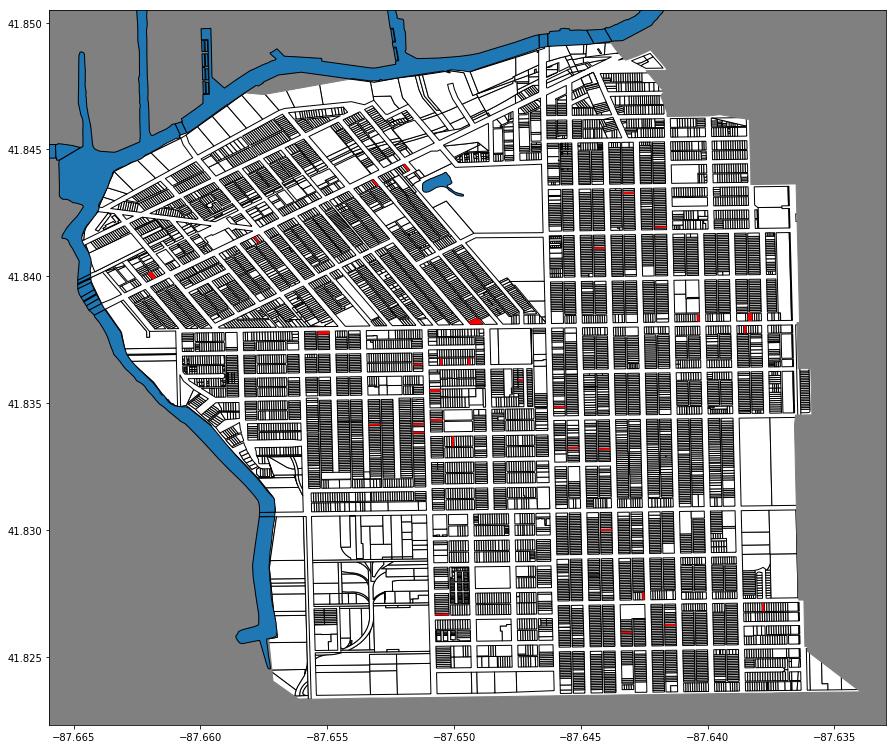

In [283]:
import matplotlib.pyplot as plt

ZOOM_LEVEL = 0.001
f, ax = plt.subplots(1, figsize=(15,15))
community_parcels.plot(ax=ax, color="white", edgecolor='black')
areas[areas['area_numbe']!="60"].plot(linewidth=1, ax=ax, edgecolor='grey', color='grey')
waterways.plot(linewidth=1, ax=ax, edgecolor='black')
tax_props_geo.plot(linewidth=1, ax=ax, color="red")
ax.set_xlim(bounds['minx'].item()-ZOOM_LEVEL, bounds['maxx'].item()+ZOOM_LEVEL)
ax.set_ylim(bounds['miny'].item()-ZOOM_LEVEL, bounds['maxy'].item()+ZOOM_LEVEL)
ax.set_axis_off()
plt.savefig("test.svg")
ax.set_axis_on()
plt.show()

In [176]:
data = data.rename(index=str, columns={"PIN":"name"})
data["name"] = data["name"].apply(str)
community_parcels = community_parcels.merge(data, on="name")

In [169]:
community_parcels["Dwelling Units"] = community_parcels["Dwelling Units"].apply(int)

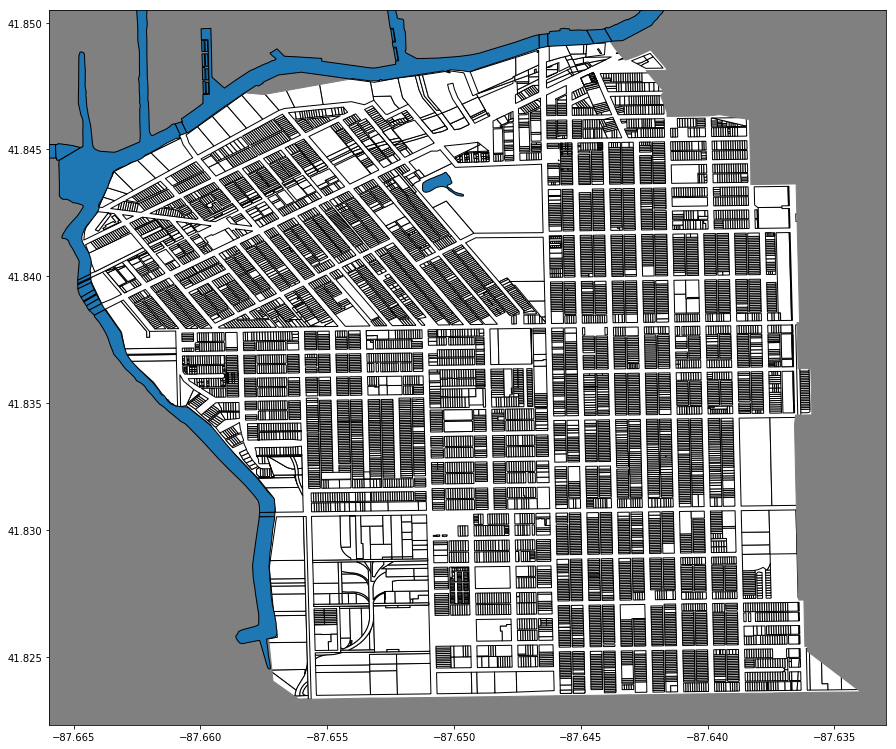

In [177]:
import matplotlib.pyplot as plt

ZOOM_LEVEL = 0.001

f, ax = plt.subplots(1, figsize=(15,15))
# community_parcels.plot(column="Property Classification", linewidth=0.2, ax=ax, edgecolor='black') #, legend=True, scheme='QUANTILES', k=len(data["Property Classification"].unique()))
community_parcels.plot(ax=ax, color="white", edgecolor='black')
# community_parcels[community_parcels["Dwelling Units"]>=3].plot(ax=ax, color="red", edgecolor='black')
# community.plot(linewidth=1, ax=ax, edgecolor='black', color='black')
# zoning[zoning['zone_class']=="RS-3"].plot(linewidth=0.5, ax=ax, color='green', alpha=.3)
areas[areas['area_numbe']!="60"].plot(linewidth=1, ax=ax, edgecolor='grey', color='grey')
waterways.plot(linewidth=1, ax=ax, edgecolor='black')
ax.set_xlim(bounds['minx'].item()-ZOOM_LEVEL, bounds['maxx'].item()+ZOOM_LEVEL)
ax.set_ylim(bounds['miny'].item()-ZOOM_LEVEL, bounds['maxy'].item()+ZOOM_LEVEL)
ax.set_axis_off()
plt.savefig("test.svg")
ax.set_axis_on()
plt.show()

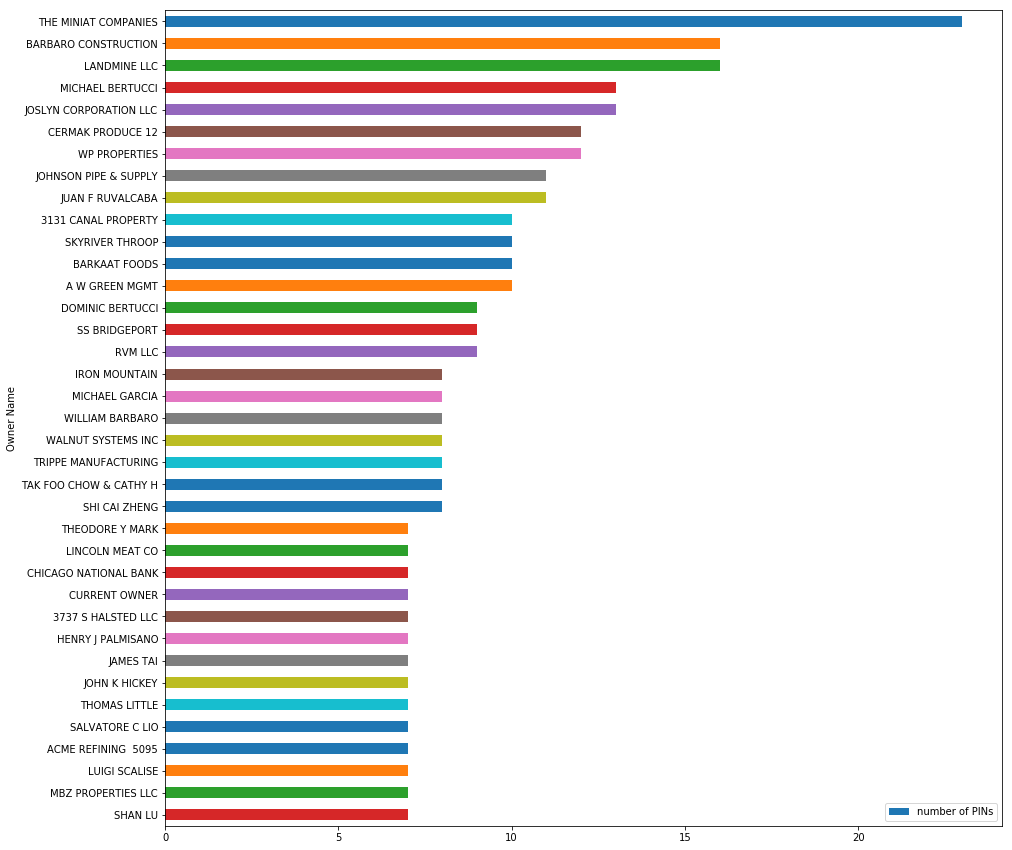

In [47]:
import matplotlib.pyplot as plt

owners = data.groupby("Owner Name").size().to_frame('number of PINs').reset_index()
# owners.sort_values("size", ascending=False)

f, ax = plt.subplots(1, figsize=(15,15))
owners.sort_values("number of PINs", ascending=False)[3:40].plot.barh(y="number of PINs",x="Owner Name", ax=ax)
plt.gca().invert_yaxis()
plt.show()

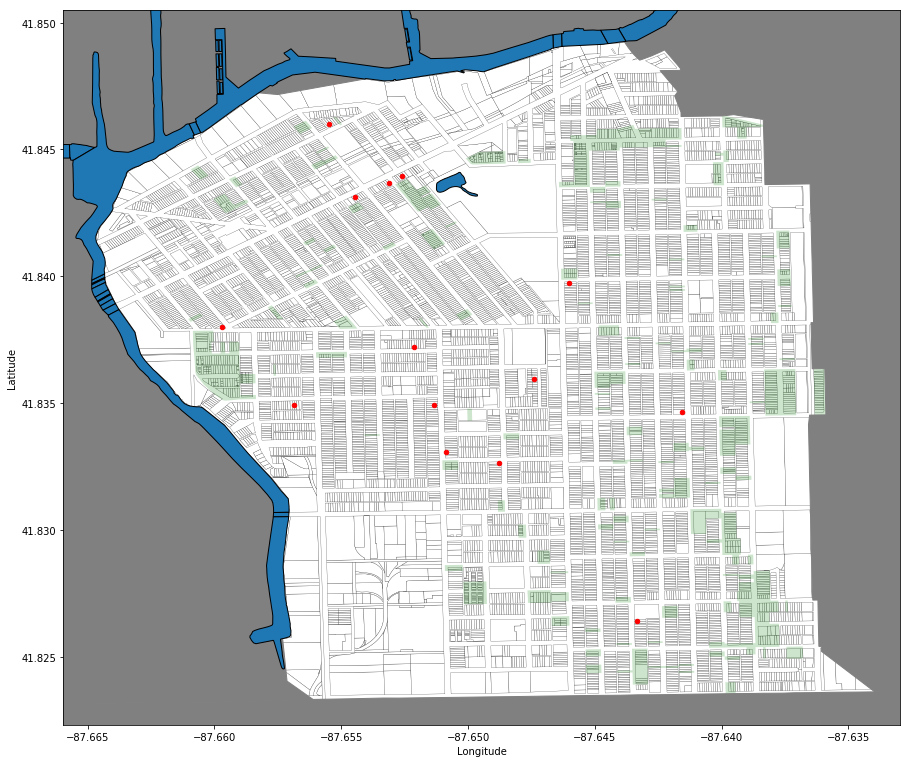

In [73]:
import matplotlib.pyplot as plt

ZOOM_LEVEL = 0.001

f, ax = plt.subplots(1, figsize=(15,15))
community_parcels.plot(linewidth=0.2, ax=ax, edgecolor='black', color='white')
# community.plot(linewidth=1, ax=ax, edgecolor='black', color='black')
zoning[zoning['zone_class']=="RT-4"].plot(linewidth=0.5, ax=ax, color='green', alpha=.2)
areas[areas['area_numbe']!="60"].plot(linewidth=1, ax=ax, edgecolor='grey', color='grey')
props.plot(x='Longitude', y='Latitude', ax=ax, kind="scatter", color="red" )
waterways.plot(linewidth=1, ax=ax, edgecolor='black')
ax.set_xlim(bounds['minx'].item()-ZOOM_LEVEL, bounds['maxx'].item()+ZOOM_LEVEL)
ax.set_ylim(bounds['miny'].item()-ZOOM_LEVEL, bounds['maxy'].item()+ZOOM_LEVEL)
ax.set_axis_off()
plt.savefig("test.svg")
ax.set_axis_on()
plt.show()

In [65]:
vacant = pd.read_csv("311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv")
vacant.keys()

Index(['SERVICE REQUEST TYPE', 'SERVICE REQUEST NUMBER',
       'DATE SERVICE REQUEST WAS RECEIVED',
       'LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).',
       'IS THE BUILDING DANGEROUS OR HAZARDOUS?',
       'IS BUILDING OPEN OR BOARDED?',
       'IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?',
       'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?',
       'IS THE BUILDING VACANT DUE TO FIRE?',
       'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)',
       'ADDRESS STREET NUMBER', 'ADDRESS STREET DIRECTION',
       'ADDRESS STREET NAME', 'ADDRESS STREET SUFFIX', 'ZIP CODE',
       'X COORDINATE', 'Y COORDINATE', 'Ward', 'Police District',
       'Community Area', 'LATITUDE', 'LONGITUDE', 'Location'],
      dtype='object')

In [66]:
pd.options.display.max_rows = 1000
vacant[vacant['Community Area']==float(areas[areas['community']=="LOWER WEST SIDE"]['area_numbe'].item())
        ][['DATE SERVICE REQUEST WAS RECEIVED','Location','ADDRESS STREET NUMBER', 'ADDRESS STREET DIRECTION','ADDRESS STREET NAME', 'ADDRESS STREET SUFFIX']]

DATE SERVICE REQUEST WAS RECEIVED  \
155                          09/16/2009   
213                          10/09/2009   
430                          12/08/2009   
2456                         06/23/2010   
2675                         07/10/2010   
3356                         08/04/2010   
3749                         08/19/2010   
4696                         09/28/2010   
5174                         10/20/2010   
5871                         11/17/2010   
6254                         12/07/2010   
6336                         12/08/2010   
6633                         12/30/2010   
6775                         01/06/2011   
6887                         01/10/2011   
6890                         01/10/2011   
6896                         01/10/2011   
6897                         01/10/2011   
7183                         01/18/2011   
7257                         01/21/2011   
7332                         01/24/2011   
7333                         01/24/2011   
7419                         01/26/2011   
7560                         02/01/2011   
7572                         02/03/2011   
7611                         02/04/2011   
7624                         02/06/2011   
7906                         02/15/2011   
7911                         02/15/2011   
7989                         02/15/2011   
8062                         02/17/2011   
8224                         02/23/2011   
8267                         02/23/2011   
8312                         02/25/2011   
8394                         03/01/2011   
8395                         03/01/2011   
8433                         03/01/2011   
8536                         03/03/2011   
8840                         03/14/2011   
8861                         03/14/2011   
9197                         03/21/2011   
9199                         03/21/2011   
9215                         03/22/2011   
9315                         03/24/2011   
9351                         03/25/2011   
9454                         03/29/2011   
9558                         03/31/2011   
9735                         04/05/2011   
9796                         04/06/2011   
9883                         04/08/2011   
10079                        04/11/2011   
10373                        04/14/2011   
11221                        05/01/2011   
11574                        05/07/2011   
12108                        05/19/2011   
12292                        05/23/2011   
12422                        05/25/2011   
12448                        05/25/2011   
12449                        05/25/2011   
12471                        05/26/2011   
12913                        06/06/2011   
13147                        06/10/2011   
13178                        06/11/2011   
13213                        06/13/2011   
13418                        06/16/2011   
13647                        06/22/2011   
13648                        06/22/2011   
13780                        06/23/2011   
13921                        06/25/2011   
13984                        06/27/2011   
14058                        06/28/2011   
14338                        07/04/2011   
14351                        07/05/2011   
14365                        07/05/2011   
14930                        07/12/2011   
15090                        07/15/2011   
15269                        07/19/2011   
15502                        07/22/2011   
15595                        07/25/2011   
15603                        07/25/2011   
15629                        07/25/2011   
15703                        07/26/2011   
15837                        07/28/2011   
15911                        07/29/2011   
15974                        07/31/2011   
16167                        08/03/2011   
16257                        08/05/2011   
16266                        08/05/2011   
16569                        08/11/2011   
16605                        08/12/2011   
16700                        08/15/2011   
16830                        08/16/2011   
16863  

In [184]:
cleveland_communities = geopandas.read_file("City_of_Cleveland_Neighborhoods_2012_no_lake.shp")
cuyahoga = geopandas.read_file("Cuyahoga_County_Municipalities.shp")
pd.options.display.max_rows = 100
cleveland_communities = cleveland_communities.rename(index=str, columns={"SPA_NAME":"Neighborhood"})


In [185]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = x.strip()

    except:
        pass
    return x

crime_cle = pd.read_csv("neocando-download.csv")
crime_cle = crime_cle.rename(index=str, columns={"Unnamed: 2":"Count"})
crime_cle["Neighborhood"] = crime_cle["Neighborhood"].apply(remove_whitespace)

In [186]:
cleveland_communities["rep"] = cleveland_communities["geometry"].centroid
points = cleveland_communities.copy()
points.set_geometry("rep", inplace = True)

In [301]:
cle = pd.read_csv("neocando-download copy 3.csv")

In [303]:
cle["Neighborhood"] = cle["Neighborhood"].apply(remove_whitespace)
cle = cleveland_communities.merge(cle, on="Neighborhood", how="inner")

In [319]:
# cle["Total property crimes, number, 2017 (Crime)"] = 
# cle["Total property crimes, number, 2017 (Crime)"].apply(lambda x: float(x))

cle[["Neighborhood", "Total violent crimes, number, 2017 (Crime)"]]

Neighborhood Total violent crimes, number, 2017 (Crime)
0          Bellaire-Puritas                                         96
1   Broadway-Slavic Village                                        448
2           Brooklyn Centre                                        107
3     Buckeye-Shaker Square                                        174
4          Buckeye-Woodhill                                        141
5                   Central                                        273
6              Clark-Fulton                                        144
7     Collinwood-Nottingham                                        250
8                    Cudell                                        164
9           Cuyahoga Valley                                         13
10         Detroit Shoreway                                        208
11                 Downtown                                        234
12                Edgewater                                         62
13             Euclid-Green                                         74
14                  Fairfax                                        198
15                Glenville                                        540
16     Goodrich-Kirtland Pk                                        120
17                  Hopkins                                          8
18                    Hough                                        178
19                Jefferson                                        156
20                   Kamm's                                        101
21                  Kinsman                                        137
22              Lee-Harvard                                        135
23              Lee-Seville                                         55
24           Mount Pleasant                                        339
25   North Shore Collinwood                                        209
26                Ohio City                                        130
27             Old Brooklyn                                        187
28                  Tremont                                         58
29              Union-Miles                                        320
30               University                                        121
31           West Boulevard                                        243
32        St.Clair-Superior                                        145
33               Stockyards                                        145

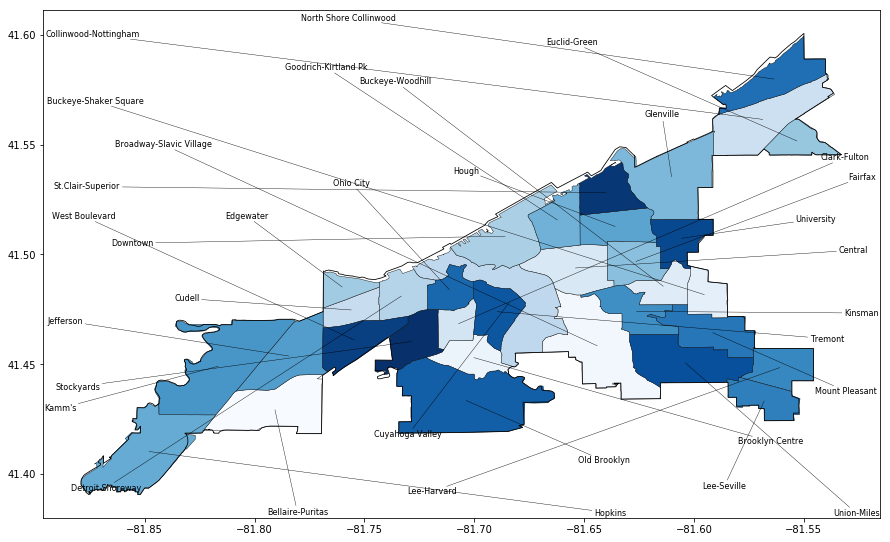

In [317]:
import matplotlib.pyplot as plt
import adjustText as aT

texts = []
f, ax = plt.subplots(1, figsize=(15,15))
cle.plot(cmap='Blues', linewidth=0.4, ax=ax, edgecolor="black")

for x, y, label in zip(points.geometry.x, points.geometry.y, points["Neighborhood"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
    

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(10,10), expand_text=(3,3), 
               arrowprops=dict(arrowstyle="-", color='black', lw=0.4))

cuyahoga[cuyahoga["MUNI_NAME"]=="Cleveland"].plot(linewidth=0.8, ax=ax, edgecolor="black", color='none')

plt.savefig("cleveland.svg")

plt.show()

In [293]:
cle["ratio"]=cle["Total population, number, 2012 5-yr est (ACS 2012 5-year)"]/cle["Total property crimes, number, 2017 (Crime)"] 

In [11]:
parcels = geopandas.read_file("Combined_Parcels__Cleveland_Only.shp")

In [320]:
hood = "Tremont"
community = cleveland_communities[cleveland_communities["Neighborhood"]==hood]
bounds = community.bounds
bounds

minx       miny       maxx       maxy
28 -81.700487  41.456015 -81.676625  41.488356

In [321]:
community_parcels = geopandas.sjoin(parcels, cleveland_communities[["geometry", "Neighborhood"]], how='left', op='intersects')

/Users/zachperkitny/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [240]:
community_parcels.to_file("cle_communities_geo.shp")

KeyboardInterrupt: 

In [ ]:
community_parcels = geopandas.read_file("community_parcels.shp")

In [322]:
community_parcels = community_parcels[community_parcels["Neighborhood"]==hood]
community_parcels["com_living"] = community_parcels["com_living"].fillna(-1)

In [323]:
pd.options.display.max_rows = 1000
community_parcels[community_parcels["com_living"]>=4][community_parcels["com_living"]<=16].sort_values("com_living", ascending=False)[["parcelpin","par_addr","par_street","par_suffix","com_living"]]

/Users/zachperkitny/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


parcelpin     par_addr    par_street par_suffix  com_living
20000   00815083         2306         MEYER        AVE        16.0
18646   00419080          515     JEFFERSON        AVE        14.0
68077   00812018         3160            14         ST        12.0
64651   00424009   2531-02557             6         ST        12.0
35834   00403004         2097      COLUMBUS         RD        11.0
783     00810001         3101            25         ST        10.0
17781   00801155         2112       SEYMOUR        AVE         8.0
56052   00412002         2186            10         ST         8.0
164679  00424007         2504             6         ST         8.0
5303    00808041         2994            14         ST         8.0
13343   00413039         1017    KENILWORTH        AVE         7.0
124542  00412054    2225-2233            11         ST         6.0
158183  00811002         3151      SCRANTON         RD         6.0
139873  00412003         2208            10         ST         6.0
1294    00409080         2109            11         ST         6.0
36156   00801152         2014       SEYMOUR         ST         6.0
133936  00414005   2442-02444       TREMONT        AVE         6.0
49052   00409078         2091            11         ST         6.0
21700   00813018         1295       HOLMDEN        AVE         6.0
95580   00811075   1701-01703        BUHRER        AVE         6.0
70810   00416090         2406     PROFESSOR         ST         6.0
52861   00409077         2085            11         ST         6.0
17282   00412020         1014    KENILWORTH        AVE         6.0
15543   00412091         2258      LITERARY         RD         6.0
129254  00421021         2609            14         ST         6.0
15285   00419002         2311             7         ST         6.0
121900  00415039         2173     PROFESSOR         ST         6.0
136645  00413042    1001-1005    KENILWORTH        AVE         5.0
52860   00403104         2014       FREEMAN        AVE         5.0
49584   00418136          434      LITERARY         RD         5.0
121435  00421011         1037  STARKWEATHER        AVE         5.0
104752  00415080         2142             7         ST         5.0
34003   00416022          858     JEFFERSON        AVE         5.0
84714   00419142         2387             5         ST         5.0
89363   00422089          919         FRUIT        AVE         5.0
142599  00409025         2104            10         ST         5.0
109180  00414004    2438-2440       TREMONT        AVE         5.0
27606   00416027          820     JEFFERSON        AVE         5.0
99410   00419138         2359             5         ST         5.0
162820  00417017         2430             7         ST         5.0
148022  00421096         1204        AUBURN        AVE         5.0
159158  00412021   1018-01020    KENILWORTH        AVE         5.0
8740    00417112         2471     PROFESSOR         ST         5.0
122081  00421106         2598            10         ST         4.0
108692  00816043         3302            17         ST         4.0
118922  00415054    2083-2085       THURMAN         ST         4.0
112190  00409053         2104            11         ST         4.0
123182  00418068         2185             6         ST         4.0
115714  00417004          859     JEFFERSON        AVE         4.0
117113  00403047         2153            20         ST         4.0
121168  00413005         2424            10         ST         4.0
119868  00419079         2375             6         ST         4.0
117708  00416082         2348     PROFESSOR         ST         4.0
114495  00417008          843     JEFFERSON        AVE         4.0
132971  00412037         1213     FAIRFIELD        AVE         4.0
125695  00411002    2411-2413      SCRANTON         RD         4.0
128243  00414009         2458       TREMONT        AVE         4.0
163200  00416095   2365-02373     PROFESSOR         ST         4.0
160138  00413021         1028  STARKWEATHER        AVE

In [228]:
pd.options.display.max_rows = 1000
# parcels.groupby("mail_name").size().reindex().to_frame().sort_values(by=0,ascending=False)
parcels[parcels["par_addr"]=="4211"][parcels["par_street"]=="LORAIN"]

/Users/zachperkitny/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


OBJECTID parcelpin cama_paren no_list_in  parcel_yea parcel_typ  \
80310    230604  00701011       None       None      2018.0       LAND   

        book_page        deeded_own           grantee            grantor  \
80310  B 007 P 01  4211 LORAIN, LLC  4211 LORAIN, LLC  CORNELL, AARON J.   

                             ...                         total_com_  \
80310                        ...                             6334.0   

       com_living total_lega total_squa total_acre  shape_Leng   shape_Area  \
80310         4.0       40.0     5000.0      0.115  330.000497  5000.038253   

      PARCEL_PK  parcel_id                                           geometry  
80310    158562   00701011  POLYGON ((-81.71491581909 41.47932308234743, -...  

[1 rows x 73 columns]

In [130]:
community_parcels.shape

AttributeError: 'function' object has no attribute 'shape'

In [123]:
# community_parcels[community_parcels.index.duplicated()].shape
# community_parcels[community_parcels.index.duplicated()]

community_parcels = community_parcels.drop_duplicates

/Users/zachperkitny/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


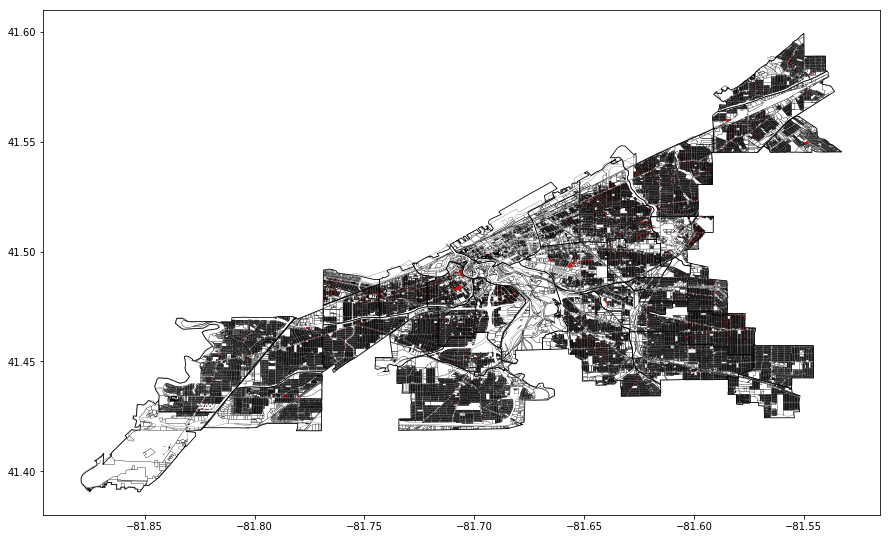

In [92]:
import matplotlib.pyplot as plt

ZOOM_LEVEL=0.001

f, ax = plt.subplots(1, figsize=(15,15))

# community.plot(linewidth=0.8, ax=ax, edgecolor='black', color="white")
# community_parcels.plot(column="com_living", cmap="jet", linewidth=0.2, ax=ax, edgecolor="black", legend=True)
# ax.set_xlim(bounds['minx'].item()-ZOOM_LEVEL, bounds['maxx'].item()+ZOOM_LEVEL)
# ax.set_ylim(bounds['miny'].item()-ZOOM_LEVEL, bounds['maxy'].item()+ZOOM_LEVEL)

cleveland_communities.plot(linewidth=0.8, ax=ax, edgecolor='black', color="white")
parcels.plot(color="none",linewidth=0.2, ax=ax, edgecolor="black")
parcels[parcels["com_living"]>=4][parcels["com_living"]<=15].plot(color="red",linewidth=0.2, ax=ax, edgecolor="black", legend=True)
plt.savefig("cleveland.svg")

plt.show()

In [324]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import time
import re
import random
import csv
from tqdm import tnrange, tqdm_notebook
import os.path

url_tax = "https://treasurer.cuyahogacounty.us/payments/real_prop/parcel_data.asp?txtParcel={}&year=2017"

def get_html(url, data):
    req = Request(url.format(data), headers={
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
        'Host': 'www.cookcountypropertyinfo.com',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'Connection': 'keep-alive',
        'Cookie': 'ASP.NET_SessionId=qcc3szcs2ihwwo34pjypslpm',
        'Upgrade-Insecure-Requests': '1',
    })

    web_byte = urlopen(req).read()
    webpage = urlopen(req).read().decode('utf-8')
    soup = BeautifulSoup(webpage, 'html.parser')
    return soup



def get_prop_info(data, data_file):
    results = []
    results.append(data)
    # Get Assessor Data 
    soup = get_html(url_tax, data)
    results.append(soup.find_all("table")[2].find_all("td")[-1].text)
    data_file.writerow(results)
        
        
if not os.path.isfile("delinquient_tax_{}.csv".format(hood)):
    print("Writing Header")
    with open("delinquient_tax_{}.csv".format(hood), "a+", newline="\n", encoding='mac_roman') as data_file:
        data_writer = csv.writer(data_file, delimiter=',')
        data_writer.writerow(
            [
                "PIN",
                "Balance"
            ]
        )
        data_file.close()
        
with open("delinquient_tax_{}.csv".format(hood), "a+", newline="\n", encoding='mac_roman') as data_file:
    data_writer = csv.writer(data_file, delimiter=',')
    for pin in tqdm_notebook(community_parcels[community_parcels["com_living"]>=4][community_parcels["com_living"]<=15]["parcelpin"]):
        for _ in tqdm_notebook(range(1),leave=False):
            get_prop_info(str(pin), data_writer)
#               print(pin)
    data_file.close()
    


Writing Header


/Users/zachperkitny/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [421]:
tax = pd.read_csv("delinquient_tax_{}.csv".format(hood), converters={'PIN': lambda x: str(x)})
tax = tax[tax["Balance"]!="0.00"].sort_values("Balance", ascending=False)
tax = tax.rename(index=str, columns={"PIN":"parcelpin"})
tax = tax.merge(community_parcels, on="parcelpin", how="left")
tax[["parcelpin","par_addr","par_predir", "par_street", "par_suffix","com_living","Balance"]]

parcelpin par_addr par_predir par_street par_suffix  com_living    Balance
0   31228039      NaN        NaN        NaN        NaN         NaN   9,443.03
1   31212039      NaN        NaN        NaN        NaN         NaN   9,010.37
2   31424007      NaN        NaN        NaN        NaN         NaN     837.94
3   31212038      NaN        NaN        NaN        NaN         NaN   8,664.62
4   31512065      NaN        NaN        NaN        NaN         NaN   7,980.81
5   31229094      NaN        NaN        NaN        NaN         NaN   7,200.10
6   31509025      NaN        NaN        NaN        NaN         NaN   6,451.55
7   31117007      NaN        NaN        NaN        NaN         NaN   6,043.70
8   31406053      NaN        NaN        NaN        NaN         NaN  51,872.81
9   31217137      NaN        NaN        NaN        NaN         NaN   5,911.57
10  31316002      NaN        NaN        NaN        NaN         NaN   4,551.73
11  31523155      NaN        NaN        NaN        NaN         NaN   4,482.40
12  31523156      NaN        NaN        NaN        NaN         NaN   4,482.40
13  31325005      NaN        NaN        NaN        NaN         NaN   4,322.79
14  31522075      NaN        NaN        NaN        NaN         NaN     302.49
15  31409126      NaN        NaN        NaN        NaN         NaN   3,605.94
16  31228035      NaN        NaN        NaN        NaN         NaN   3,603.25
17  31115026      NaN        NaN        NaN        NaN         NaN   3,516.58
18  31232060      NaN        NaN        NaN        NaN         NaN   3,046.51
19  31234017      NaN        NaN        NaN        NaN         NaN  27,939.15
20  31212052      NaN        NaN        NaN        NaN         NaN  27,881.95
21  31316006      NaN        NaN        NaN        NaN         NaN  26,527.44
22  31321022      NaN        NaN        NaN        NaN         NaN  25,455.22
23  31231050      NaN        NaN        NaN        NaN         NaN  25,089.29
24  67306065      NaN        NaN        NaN        NaN         NaN  22,959.31
25  31512032      NaN        NaN        NaN        NaN         NaN  21,875.75
26  31409125      NaN        NaN        NaN        NaN         NaN   2,976.71
27  31232057      NaN        NaN        NaN        NaN         NaN   2,712.81
28  31512143      NaN        NaN        NaN        NaN         NaN   2,697.44
29  31512113      NaN        NaN        NaN        NaN         NaN   2,410.94
30  31127079      NaN        NaN        NaN        NaN         NaN   2,156.61
31  31512088      NaN        NaN        NaN        NaN         NaN  14,149.31
32  31522106      NaN        NaN        NaN        NaN         NaN  12,493.33
33  31229109      NaN        NaN        NaN        NaN         NaN  11,700.10
34  31522033      NaN        NaN        NaN        NaN         NaN  10,663.01
35  31234047      NaN        NaN        NaN        NaN         NaN   1,942.72
36  31227039      NaN        NaN        NaN        NaN         NaN   1,399.59
37  31229008      NaN        NaN        NaN        NaN         NaN   1,383.60
38  31119034      NaN        NaN        NaN        NaN         NaN   1,065.25
39  31518017      NaN        NaN        NaN        NaN         NaN       0.10

In [334]:
Cuyahoga = geopandas.read_file("Cuyahoga_County_Municipalities.shp")
Lorain = geopandas.read_file("Cities_and_Villages.shp")

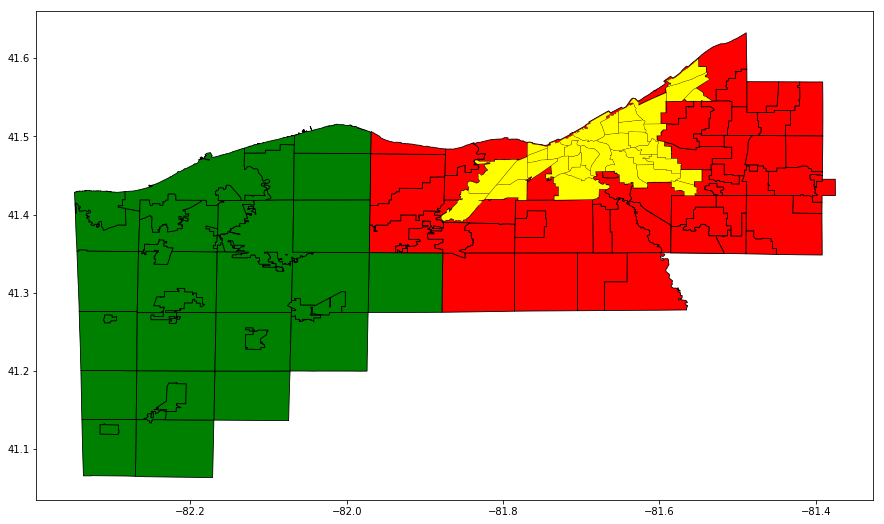

In [337]:
import matplotlib.pyplot as plt

ZOOM_LEVEL=0.001

f, ax = plt.subplots(1, figsize=(15,15))

Cuyahoga.plot(linewidth=0.8, ax=ax, edgecolor='black', color="Red")
Lorain.plot(linewidth=0.8, ax=ax, edgecolor='black', color="Green")
cleveland_communities.plot(linewidth=0.2, ax=ax, edgecolor="black", color="Yellow")
plt.savefig("Cuyahoga-Lorain.svg")

plt.show()

In [338]:
Cuyahoga

OBJECTID CALC_AREA                CREATED_DA                LAST_EDITE  \
0          1      None                      None  2016-06-02T21:24:29.000Z   
1          2      None                      None  2018-02-27T17:08:59.000Z   
2          3      None                      None  2017-03-24T03:37:33.000Z   
3          4      None                      None  2017-10-23T14:11:24.000Z   
4          5      None  2016-10-01T03:18:53.000Z  2017-02-23T17:57:30.000Z   
5          6      None  2014-04-10T17:33:09.000Z  2015-12-13T03:35:29.000Z   
6          7      None                      None  2016-09-01T14:26:52.000Z   
7          8      None                      None  2017-11-28T22:13:38.000Z   
8          9      None                      None  2016-10-01T03:20:13.000Z   
9         10      None                      None  2015-12-15T15:46:57.000Z   
10        11      None                      None  2015-12-14T17:38:43.000Z   
11        12      None                      None  2017-05-04T15:03:58.000Z   
12        13      None                      None  2016-06-06T20:28:35.000Z   
13        14      None                      None  2016-02-16T20:36:00.000Z   
14        15      None                      None  2016-04-11T13:43:08.000Z   
15        16      None                      None  2017-04-25T18:09:16.000Z   
16        17      None                      None  2018-01-04T20:09:26.000Z   
17        18      None  2015-10-01T20:08:08.000Z  2018-03-01T17:04:35.000Z   
18        19      None                      None  2017-06-08T19:18:04.000Z   
19        20      None                      None  2017-02-23T17:58:05.000Z   
20        21      None                      None  2015-12-12T03:49:31.000Z   
21        22      None                      None  2017-11-28T17:09:09.000Z   
22        23      None                      None  2018-03-06T20:57:41.000Z   
23        24      None  2016-11-01T15:08:10.000Z  2017-01-23T17:12:47.000Z   
24        25      None                      None  2015-12-15T15:08:16.000Z   
25        26      None                      None  2015-12-13T02:44:18.000Z   
26        27      None                      None  2017-03-14T19:53:45.000Z   
27        28      None                      None  2016-07-30T23:55:28.000Z   
28        29      None                      None  2016-03-02T14:55:37.000Z   
29        30      None                      None  2017-05-01T14:55:51.000Z   
30        31      None                      None  2017-01-14T17:27:36.000Z   
31        32      None  2016-01-13T15:23:42.000Z  2017-01-23T17:07:01.000Z   
32        33      None                      None  2016-09-22T15:06:19.000Z   
33        34      None                      None  2017-04-25T18:09:12.000Z   
34        35      None                      None  2017-03-03T20:33:01.000Z   
35        36      None                      None  2016-03-07T20:44:32.000Z   
36        37      None                      None  2015-12-15T20:06:28.000Z   
37        38      None                      None  2016-07-19T19:12:34.000Z   
38        39      None                      None  2017-12-12T21:02:17.000Z   
39        40      None  2016-08-02T16:54:09.000Z  2016-08-02T16:57:53.000Z   
40        41      None                      None  2016-03-17T21:24:10.000Z   
41        42      None  2016-08-02T16:54:50.000Z  2016-08-02T16:57:48.000Z   
42        43      None                      None  2016-09-01T14:12:34.000Z   
43        44      None                      None  2015-12-14T15:14:44.000Z   
44        46      None  2014-11-18T22:06:28.000Z  2018-02-27T17:08:59.000Z   
45        47      None                      None  2016-09-22T15:06:50.000Z   
46        48      None                      None  2017-05-01T14:55:43.000Z   
47        49      None                      None  2015-12-13T03:43:20.000Z   
48        50      None  2014-07-23T19:47:50.000Z  2018-01-04T20:09:26.000Z   
49        51      None  2016-01-13T15:26:32.000Z  2016-05-18T21:46:21.000Z   
50        52      None    

In [339]:
Lorain

OBJECTID              COMMUNITY  SHAPE_STAr  SHAPE_STLe  \
0          1         KIPTON VILLAGE           0           0   
1          2      ROCHESTER VILLAGE           0           0   
2          3      SHEFFIELD VILLAGE           0           0   
3          4  SOUTH AMHERST VILLAGE           0           0   
4          5  NORTH RIDGEVILLE CITY           0           0   
5          6       LAGRANGE VILLAGE           0           0   
6          7     WELLINGTON VILLAGE           0           0   
7          8           OBERLIN CITY           0           0   
8          9              AVON CITY           0           0   
9         10    HUNTINGTON TOWNSHIP           0           0   
10        11      PENFIELD TOWNSHIP           0           0   
11        12      BRIGHTON TOWNSHIP           0           0   
12        13        CAMDEN TOWNSHIP           0           0   
13        14      COLUMBIA TOWNSHIP           0           0   
14        15     HENRIETTA TOWNSHIP           0           0   
15        16     BROWNHELM TOWNSHIP           0           0   
16        17    WELLINGTON TOWNSHIP           0           0   
17        18    PITTSFIELD TOWNSHIP           0           0   
18        19        ELYRIA TOWNSHIP           0           0   
19        20    NEW RUSSIA TOWNSHIP           0           0   
20        21       AMHERST TOWNSHIP           0           0   
21        22        ELYRIA TOWNSHIP           0           0   
22        23        ELYRIA TOWNSHIP           0           0   
23        24        ELYRIA TOWNSHIP           0           0   
24        25     ROCHESTER TOWNSHIP           0           0   
25        26         VERMILION CITY           0           0   
26        27            LORAIN CITY           0           0   
27        28      LAGRANGE TOWNSHIP           0           0   
28        29      CARLISLE TOWNSHIP           0           0   
29        30        GRAFTON VILLAGE           0           0   
30        31         EATON TOWNSHIP           0           0   
31        32    SHEFFIELD LAKE CITY           0           0   
32        33            ELYRIA CITY           0           0   
33        34     SHEFFIELD TOWNSHIP           0           0   
34        35         AVON LAKE CITY           0           0   
35        36       AMHERST TOWNSHIP           0           0   
36        37           AMHERST CITY           0           0   
37        38       GRAFTON TOWNSHIP           0           0   
38        39        ELYRIA TOWNSHIP           0           0   

                                             geometry  
0   POLYGON ((-82.30190820742318 41.27177521991265...  
1   POLYGON ((-82.30921535511895 41.13229898564215...  
2   POLYGON ((-82.07215634970595 41.48939869093216...  
3   POLYGON ((-82.23010669987946 41.36527959786162...  
4   POLYGON ((-81.97110891225434 41.35127446627741...  
5   POLYGON ((-82.11975707502064 41.25251018235467...  
6   POLYGON ((-82.23079385170698 41.14815184175096...  
7   POLYGON ((-82.20711298639813 41.30279220853898...  
8   POLYGON ((-82.05074741047709 41.41880412748582...  
9   POLYGON ((-82.25524071649558 41.13767941539828...  
10  POLYGON ((-82.16988666625741 41.13710485308113...  
11  POLYGON ((-82.28292807990985 41.20029664319383...  
12  POLYGON ((-82.28292807990985 41.20029664319383...  
13  POLYGON ((-81.97255511168541 41.27484148108173...  
14  POLYGON ((-82.26627870411826 41.35265703206777...  
15  POLYGON ((-82.34178634311196 41.41016575427506...  
16  (POLYGON ((-82.23079385170698 41.1481518417509...  
17  POLYGON ((-82.16706379604689 41.27453812280257...  
18  POLYGON ((-82.12558576853749 41.41826419830398...  
19  POLYGON ((-82.26345110699 41.35305773470047, -...  
20  POLYGON ((-82.2410141892988 41.35412115716019,...  
21  POLYGON ((-82.13715977708901 41.35657529590251...  
22  POLYGON ((-82.1652590783472 41.37256272702658,...  
23  POLYGON ((-82.12162640818187 41.40427186162488...  
24  POLYGON ((-82.27107468547892 41.13773217908655...  
25  (POLYGON ((-82.34664370

In [341]:
non_cleveland_parcels = geopandas.read_file("Combined_Parcels__NonCleveland_Only/Combined_Parcels__NonCleveland_Only.shp")

In [464]:
lorain_parcels = geopandas.read_file("Tax_Parcels/Tax_Parcels.shp")

In [345]:
non_cleveland_parcels.keys()

Index(['OBJECTID', 'parcelpin', 'cama_paren', 'no_list_in', 'book_page',
       'parcel_typ', 'parcel_yea', 'deeded_own', 'grantee', 'grantor',
       'transfer_d', 'sales_amou', 'par_addr', 'par_predir', 'par_street',
       'par_suffix', 'par_unit', 'par_city', 'par_zip', 'par_addr_a',
       'mail_name', 'mail_addr_', 'mail_unit', 'mail_city', 'mail_state',
       'mail_zip', 'mail_count', 'tax_luc', 'tax_luc_de', 'ext_luc',
       'ext_luc_de', 'zoning_cod', 'zoning_use', 'property_c', 'tax_distri',
       'neighborho', 'condo_comp', 'tax_abatem', 'road_type', 'water', 'sewer',
       'gas', 'electricit', 'tax_year', 'certified_', 'certifie_1',
       'certifie_2', 'certifie_3', 'certifie_4', 'certifie_5', 'certifie_6',
       'certifie_7', 'certifie_8', 'certifie_9', 'certifie10', 'certifie11',
       'gross_cert', 'gross_ce_1', 'gross_ce_2', 'res_bldg_c', 'total_res_',
       'total_re_1', 'com_bldg_c', 'total_com_', 'com_living', 'total_lega',
       'total_squa', 'total_acre', 

In [346]:
non_cleveland_parcels = geopandas.sjoin(non_cleveland_parcels, cuyahoga[['MUNI_NAME', 'geometry']], how='left', op='intersects')

In [382]:
if not os.path.isfile("delinquient_tax_{}.csv".format(hood)):
    print("Writing Header")
    with open("delinquient_tax_{}.csv".format(hood), "a+", newline="\n", encoding='mac_roman') as data_file:
        data_writer = csv.writer(data_file, delimiter=',')
        data_writer.writerow(
            [
                "PIN",
                "Balance"
            ]
        )
        data_file.close()
        
with open("delinquient_tax_{}.csv".format(hood), "a+", newline="\n", encoding='mac_roman') as data_file:
    data_writer = csv.writer(data_file, delimiter=',')
    for pin in tqdm_notebook(non_cleveland_parcels[non_cleveland_parcels["MUNI_NAME"]==hood][non_cleveland_parcels["com_living"]>=4][non_cleveland_parcels["com_living"]<=16]["parcelpin"]):
        for _ in tqdm_notebook(range(1),leave=False):
            get_prop_info(str(pin), data_writer)
#               print(pin)
    data_file.close()

/Users/zachperkitny/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [428]:
import datetime

tax = pd.read_csv("delinquient_tax_{}.csv".format(hood), converters={'PIN': lambda x: str(x)})
tax = tax[tax["Balance"]!="0.00"].sort_values("Balance", ascending=False)
tax = tax.rename(index=str, columns={"PIN":"parcelpin"})
tax = tax.merge(non_cleveland_parcels[non_cleveland_parcels["MUNI_NAME"]==hood], on="parcelpin", how="left")
tax[["parcelpin","par_addr", "par_street", "par_suffix","com_living","Balance","transfer_d"]].sort_values("com_living", ascending=False)

parcelpin par_addr     par_street par_suffix  com_living    Balance  \
5   31229094     1303           COVE        AVE        15.0   7,200.10   
16  31228035     1276           COVE        AVE        14.0   3,603.25   
15  31409126     1681        LINCOLN        AVE        13.0   3,605.94   
21  31316006    15645        MADISON        AVE        13.0  26,527.44   
0   31228039     1292           COVE        AVE        12.0   9,443.03   
7   31117007     1348   WEST CLIFTON       BLVD        11.0   6,043.70   
26  31409125     1685        LINCOLN        AVE        11.0   2,976.71   
9   31217137     1379          BELLE        AVE        11.0   5,911.57   
20  31212052     1170         FRENCH        AVE        11.0  27,881.95   
23  31231050     1371       CLARENCE        AVE        10.0  25,089.29   
11  31523155     2023          QUAIL         ST        10.0   4,482.40   
12  31523156     2019          QUAIL         ST        10.0   4,482.40   
37  31229008    11871           LAKE        AVE        10.0   1,383.60   
2   31424007    14027        MADISON        AVE         9.0     837.94   
22  31321022    16808        MADISON        AVE         8.0  25,455.22   
34  31522033     2154           DOWD        AVE         7.0  10,663.01   
36  31227039    12970        CLIFTON       BLVD         7.0   1,399.59   
18  31232060     1350           COVE        AVE         6.0   3,046.51   
19  31234017    11806        CLIFTON       BLVD         6.0  27,939.15   
39  31518017    13315        MADISON        AVE         6.0       0.10   
13  31325005    15613        DETROIT        AVE         6.0   4,322.79   
32  31522106    12721         PLOVER         ST         5.0  12,493.33   
10  31316002    15721        MADISON        AVE         5.0   4,551.73   
8   31406053     1588         WARREN         RD         5.0  51,872.81   
31  31512088     1602      RIDGEWOOD        AVE         5.0  14,149.31   
38  31119034     1495      RIVERSIDE         RD         4.0   1,065.25   
3   31212038    14903        CLIFTON       BLVD         4.0   8,664.62   
4   31512065     1632       LAKEWOOD        AVE         4.0   7,980.81   
35  31234047     1297           HIRD        AVE         4.0   1,942.72   
6   31509025    13222        MADISON        AVE         4.0   6,451.55   
33  31229109     1283  CLIFTON PRADO       None         4.0  11,700.10   
1   31212039    14909        CLIFTON       BLVD         4.0   9,010.37   
17  31115026     1353        MATHEWS        AVE         4.0   3,516.58   
29  31512113     1587      RIDGEWOOD        AVE         4.0   2,410.94   
28  31512143     1607     WINCHESTER        AVE         4.0   2,697.44   
27  31232057     1363       LAKEWOOD        AVE         4.0   2,712.81   
25  31512032    12420        MADISON        AVE         4.0  21,875.75   
14  31522075     2103          ROBIN         ST         4.0     302.49   
30  31127079     1360     BONNIEVIEW        AVE         4.0   2,156.61   
24  67306065      NaN            NaN        NaN         NaN  22,959.31   

                  transfer_d  
5   2007-06-13T11:13:00.000Z  
16  2017-11-28T09:18:00.000Z  
15  2011-09-15T15:00:00.000Z  
21  2015-05-08T12:02:00.000Z  
0   2017-07-07T12:47:00.000Z  
7   1981-10-15T00:00:00.000Z  
26  2012-02-08T11:35:00.000Z  
9   2006-07-24T14:56:00.000Z  
20  2009-09-25T13:53:00.000Z  
23  2015-09-03T11:02:00.000Z  
11  1989-07-10T00:00:00.000Z  
12  1989-07-10T00:00:00.000Z  
37  2009-11-17T14:43:00.000Z  
2   2017-11-03T15:12:00.000Z  
22  2015-03-24T13:10:00.000Z  
34  2017-03-09T15:16:00.000Z  
36  2017-06-15T14:48:00.000Z  
18  2012-08-24T15:19:00.000Z  
19  1997-10-31T00:00:00.000Z  
39  1995-12-11T00:00:00.000Z  
13  2016-06-24T13:29:00.000Z  
32  2014-07-07T15:50:00.000Z  
10  2017-05-05T09:37:00.000Z  
8   2004-10-29T13:01:00.000Z  
31  2018-01-30T11:38:00.000Z  
38  2011-09-23T15:25:00.000Z  
3   1989-12-29T00:00:00.000Z  
4   2012-12-24T09:51:00.000Z  
35  2008-11-14T14:13:00.000Z  
6   2011-12-28T15:48:00.000Z  
33  199

In [415]:
tax = geopandas.GeoDataFrame(tax)

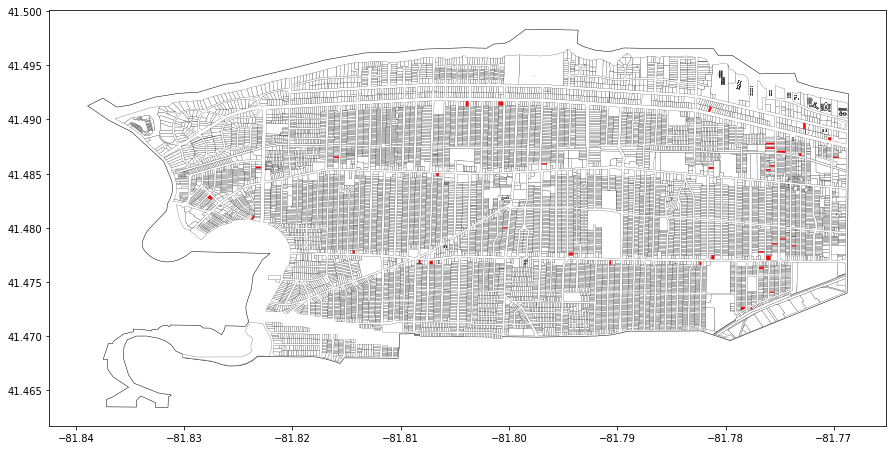

In [416]:
import matplotlib.pyplot as plt

ZOOM_LEVEL=0.001

f, ax = plt.subplots(1, figsize=(15,15))

Cuyahoga[Cuyahoga["MUNI_NAME"]=="Lakewood"].plot(linewidth=0.5, ax=ax, edgecolor="black", color="white")

non_cleveland_parcels[non_cleveland_parcels["MUNI_NAME"]==hood].plot(
    edgecolor="black",
    linewidth=0.2, 
    ax=ax,
    color="white",
)


tax.plot(
    linewidth=0.2, 
    ax=ax,
    color="red",
)

plt.savefig("{}.svg".format(hood))

plt.show()

In [420]:
non_cleveland_parcels[non_cleveland_parcels["MUNI_NAME"]==hood][non_cleveland_parcels["com_living"]>=4][non_cleveland_parcels["com_living"]<=16].sort_values("transfer_d", ascending=False)[["parcelpin","par_addr", "par_street", "par_suffix","com_living","transfer_d"]]
# non_cleveland_parcels.keys()

/Users/zachperkitny/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


parcelpin       par_addr        par_street par_suffix  com_living  \
57197   31522092          12323            PLOVER         ST         4.0   
85520   31522078           2100              LARK         ST         4.0   
235617  31316011           2018          LAKELAND        AVE         8.0   
99764   31522070           2116             ROBIN         ST         4.0   
307196  31515075           1583            NEWMAN        AVE         4.0   
224271  31523127           2040             ROBIN         ST        12.0   
147460  31212076           1175           ANDREWS        AVE         5.0   
70602   31522088          12307            PLOVER         ST         4.0   
31287   31314003          16209           MADISON        AVE         4.0   
30113   31314004          16201           MADISON        AVE         4.0   
149835  31229082           1248             BEACH        AVE         5.0   
38181   31232057           1363          LAKEWOOD        AVE         4.0   
106928  31324035       16612-14           MADISON        AVE         4.0   
77590   31324034          16602           MADISON        AVE         4.0   
68785   31523165           2042             QUAIL         ST         5.0   
19922   31117036           1356        KENILWORTH        AVE         4.0   
130344  31234035          11719           CLIFTON       BLVD         4.0   
130122  31512088           1602         RIDGEWOOD        AVE         5.0   
193703  31233006          11912           DETROIT        AVE         4.0   
16637   31114044           1345            SLOANE        AVE         4.0   
24179   31506022          13348           MADISON        AVE         5.0   
2899    31212042          15103           CLIFTON       BLVD         4.0   
45569   31115043       18520-24           DETROIT        AVE         4.0   
35401   31131070           1207          CRANFORD        AVE         4.0   
215339  31511113           1563          LAKEWOOD        AVE         4.0   
40939   31511131           1490          LAKEWOOD        AVE         4.0   
183074  31510047           1422          LAKEWOOD        AVE         4.0   
262066  31220055          14126           DETROIT        AVE         4.0   
15320   31212043          15107           CLIFTON       BLVD         5.0   
108297  31322143           1440     ORCHARD GROVE        AVE         4.0   
106379  31321023          16812           MADISON        AVE        11.0   
47095   31232039           1335              COVE        AVE        10.0   
11344   31212046          15121           CLIFTON       BLVD         8.0   
8487    31403034          15514           MADISON        AVE        10.0   
250372  31229037           1265               FRY        AVE         4.0   
182269  31228035           1276              COVE        AVE        14.0   
35245   31216166           1296            WARREN         RD         4.0   
59426   31231048           1351          CLARENCE        AVE         5.0   
12585   31512024          12210           MADISON        AVE         4.0   
31976   31422001          14323           MADISON        AVE        14.0   
75084   31510096           1471         RIDGEWOOD        AVE         4.0   
34962   31520014           2040          HALSTEAD        AVE         6.0   
105449  31424007          14027           MADISON        AVE         9.0   
120907  31523080           2014              LARK         ST         4.0   
20532   31513091           1435           COUTANT         ST         4.0   
277999  31233050        1365-71               FRY        AVE         4.0   
270268  31523093           2070              LARK         ST         4.0   
250376  31424008          14021           MADISON        AVE         4.0   
141613  31522013           2113          HALSTEAD        AVE         4.0   
161508  31424011          13749           MADISON        AVE        15.0   
313954  31228039           1292              COVE        AVE        12.0   
73166   31523078           2015              LARK      

In [423]:
non_cleveland_parcels[non_cleveland_parcels["MUNI_NAME"]==hood][non_cleveland_parcels["com_living"]>=4].sort_values("com_living", ascending=False)[["parcelpin","par_addr", "par_street", "par_suffix","com_living","transfer_d"]]

/Users/zachperkitny/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


parcelpin       par_addr        par_street par_suffix  com_living  \
61915   31210002          12506         EDGEWATER         DR       180.0   
99719   31220044          14312           DETROIT        AVE       179.0   
118872  31209007          12540         EDGEWATER        AVE       171.0   
90663   31220046          14300           DETROIT        AVE       160.0   
39034   31220047          14300           DETROIT        AVE       160.0   
172870  31123026          17600           DETROIT        AVE       156.0   
220294  31115061          18900           DETROIT        AVE       152.0   
11572   31512028          12400           MADISON        AVE       145.0   
51639   31115060          18645           DETROIT        AVE       144.0   
163022  31118078          18915           DETROIT        AVE       141.0   
9352    31211003          11800         EDGEWATER         DR       140.0   
21587   31223015          13900           DETROIT        AVE       132.0   
283858  31114033           1370            SLOANE        AVE       131.0   
40515   31210006          11900         EDGEWATER         DR       119.0   
283576  31119004       18401-05           DETROIT        AVE       108.0   
293082  31233010      1336-1340              HIRD        AVE        96.0   
315044  31220029           1341           MARLOWE        AVE        91.0   
279821  31223027     1369-75-81             BUNTS         RD        83.0   
115167  31504001          13307           DETROIT        AVE        82.0   
164326  31229046          11849           CLIFTON       BLVD        80.0   
245632  31231001          13330           DETROIT        AVE        74.0   
141287  31127040           1327        BONNIEVIEW        AVE        72.0   
1043    31122023          17920           DETROIT        AVE        65.0   
201993  31407005          14401           DETROIT        AVE        65.0   
255182  31314005          16300          HILLIARD         RD        62.0   
215992  31513058           1437            NEWMAN        AVE        60.0   
223220  31234026          11839           CLIFTON       BLVD        59.0   
94422   31418012          14555           MADISON        AVE        58.0   
30630   31229007          12019              LAKE        AVE        54.0   
46060   31210018          12530              LAKE        AVE        51.0   
30795   31210014          12505         EDGEWATER         DR        50.0   
226906  31230057          13608           DETROIT        AVE        50.0   
157246  31230056          13542           DETROIT        AVE        50.0   
330469  31514092           1510            NEWMAN        AVE        48.0   
42333   31210021          12050              LAKE        AVE        48.0   
163103  31228031          12511           CLIFTON       BLVD        46.0   
56865   31210025          12020              LAKE        AVE        46.0   
232593  31234010          11707              LAKE         RD        43.0   
202260  31211016          11837         EDGEWATER         DR        43.0   
80336   31504009          13509           DETROIT        AVE        42.0   
317945  31115063          18725           DETROIT        AVE        42.0   
115669  31229088           1277              COVE        AVE        40.0   
39805   31507011          13221           DETROIT        AVE        40.0   
9910    31229010  11864 & 11866           CLIFTON       BLVD        39.0   
277709  31210011          12031         EDGEWATER         DR        38.0   
128746  31215040          14530           CLIFTON       BLVD        38.0   
230027  31211025          11820              LAKE        AVE        38.0   
253341  31211023          11738              LAKE        AVE        38.0   
314170  31122019           1392              WEBB         RD        37.0   
43260   31210022          12030              LAKE        AVE        36.0   
174489  31231053           1380          CLARENCE        AVE        36.0   
181645  31116050          18240           DETROIT      

/Users/zachperkitny/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


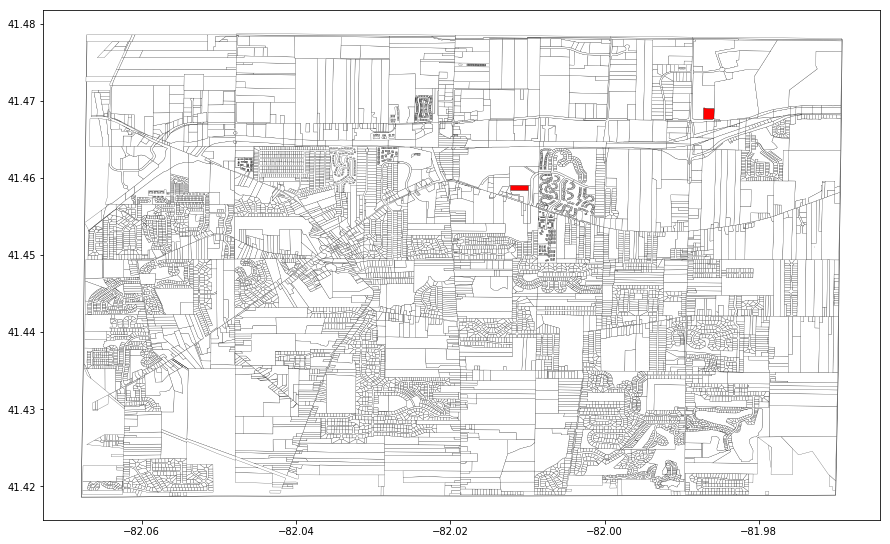

In [504]:
import matplotlib.pyplot as plt

hood="AVON CITY"
ZOOM_LEVEL=0.001

f, ax = plt.subplots(1, figsize=(15,15))

Lorain[Lorain["COMMUNITY"]==hood].plot(linewidth=0.5, ax=ax, edgecolor="black", color="white")

lorain_parcels[lorain_parcels["COMMUNITY"]==hood].plot(
    edgecolor="black",
    linewidth=0.2, 
    ax=ax,
    color="white",
)

lorain_parcels[lorain_parcels["COMMUNITY"]==hood][lorain_parcels["class_code"].isin(["411"])].plot(
    edgecolor="black",
    linewidth=0.2, 
    ax=ax,
    color="red",
)

plt.savefig("{}.svg".format(hood))

plt.show()

In [429]:
Lorain

OBJECTID              COMMUNITY  SHAPE_STAr  SHAPE_STLe  \
0          1         KIPTON VILLAGE           0           0   
1          2      ROCHESTER VILLAGE           0           0   
2          3      SHEFFIELD VILLAGE           0           0   
3          4  SOUTH AMHERST VILLAGE           0           0   
4          5  NORTH RIDGEVILLE CITY           0           0   
5          6       LAGRANGE VILLAGE           0           0   
6          7     WELLINGTON VILLAGE           0           0   
7          8           OBERLIN CITY           0           0   
8          9              AVON CITY           0           0   
9         10    HUNTINGTON TOWNSHIP           0           0   
10        11      PENFIELD TOWNSHIP           0           0   
11        12      BRIGHTON TOWNSHIP           0           0   
12        13        CAMDEN TOWNSHIP           0           0   
13        14      COLUMBIA TOWNSHIP           0           0   
14        15     HENRIETTA TOWNSHIP           0           0   
15        16     BROWNHELM TOWNSHIP           0           0   
16        17    WELLINGTON TOWNSHIP           0           0   
17        18    PITTSFIELD TOWNSHIP           0           0   
18        19        ELYRIA TOWNSHIP           0           0   
19        20    NEW RUSSIA TOWNSHIP           0           0   
20        21       AMHERST TOWNSHIP           0           0   
21        22        ELYRIA TOWNSHIP           0           0   
22        23        ELYRIA TOWNSHIP           0           0   
23        24        ELYRIA TOWNSHIP           0           0   
24        25     ROCHESTER TOWNSHIP           0           0   
25        26         VERMILION CITY           0           0   
26        27            LORAIN CITY           0           0   
27        28      LAGRANGE TOWNSHIP           0           0   
28        29      CARLISLE TOWNSHIP           0           0   
29        30        GRAFTON VILLAGE           0           0   
30        31         EATON TOWNSHIP           0           0   
31        32    SHEFFIELD LAKE CITY           0           0   
32        33            ELYRIA CITY           0           0   
33        34     SHEFFIELD TOWNSHIP           0           0   
34        35         AVON LAKE CITY           0           0   
35        36       AMHERST TOWNSHIP           0           0   
36        37           AMHERST CITY           0           0   
37        38       GRAFTON TOWNSHIP           0           0   
38        39        ELYRIA TOWNSHIP           0           0   

                                             geometry  
0   POLYGON ((-82.30190820742318 41.27177521991265...  
1   POLYGON ((-82.30921535511895 41.13229898564215...  
2   POLYGON ((-82.07215634970595 41.48939869093216...  
3   POLYGON ((-82.23010669987946 41.36527959786162...  
4   POLYGON ((-81.97110891225434 41.35127446627741...  
5   POLYGON ((-82.11975707502064 41.25251018235467...  
6   POLYGON ((-82.23079385170698 41.14815184175096...  
7   POLYGON ((-82.20711298639813 41.30279220853898...  
8   POLYGON ((-82.05074741047709 41.41880412748582...  
9   POLYGON ((-82.25524071649558 41.13767941539828...  
10  POLYGON ((-82.16988666625741 41.13710485308113...  
11  POLYGON ((-82.28292807990985 41.20029664319383...  
12  POLYGON ((-82.28292807990985 41.20029664319383...  
13  POLYGON ((-81.97255511168541 41.27484148108173...  
14  POLYGON ((-82.26627870411826 41.35265703206777...  
15  POLYGON ((-82.34178634311196 41.41016575427506...  
16  (POLYGON ((-82.23079385170698 41.1481518417509...  
17  POLYGON ((-82.16706379604689 41.27453812280257...  
18  POLYGON ((-82.12558576853749 41.41826419830398...  
19  POLYGON ((-82.26345110699 41.35305773470047, -...  
20  POLYGON ((-82.2410141892988 41.35412115716019,...  
21  POLYGON ((-82.13715977708901 41.35657529590251...  
22  POLYGON ((-82.1652590783472 41.37256272702658,...  
23  POLYGON ((-82.12162640818187 41.40427186162488...  
24  POLYGON ((-82.27107468547892 41.13773217908655...  
25  (POLYGON ((-82.34664370

In [465]:
lorain_parcels = geopandas.sjoin(lorain_parcels, Lorain[["COMMUNITY","geometry"]], how="left", op='intersects')

In [501]:
lorain_parcels[lorain_parcels["class_code"].isin(["406","433","481"])].groupby("COMMUNITY").size().sort_values()

COMMUNITY
AMHERST TOWNSHIP          1
PITTSFIELD TOWNSHIP       1
OBERLIN CITY              1
WELLINGTON TOWNSHIP       1
ELYRIA TOWNSHIP           1
LAGRANGE VILLAGE          1
BROWNHELM TOWNSHIP        1
SHEFFIELD LAKE CITY       2
CARLISLE TOWNSHIP         3
SHEFFIELD TOWNSHIP        3
COLUMBIA TOWNSHIP         4
ELYRIA CITY               5
WELLINGTON VILLAGE        6
LORAIN CITY              14
NEW RUSSIA TOWNSHIP      24
NORTH RIDGEVILLE CITY    35
VERMILION CITY           36
EATON TOWNSHIP           40
AVON CITY                51
AVON LAKE CITY           92
dtype: int64

In [484]:
lorain_parcels = lorain_parcels[~lorain_parcels.index.duplicated()]

In [488]:
lorain_parcels.keys()

Index(['OBJECTID', 'PIN', 'owner_name', 'owner_na_1', 'owner_addr',
       'owner_ad_1', 'mailing_ad', 'mailing__1', 'sale_amoun', 'sale_valid',
       'assessed_l', 'assessed_b', 'assessed_t', 'class_code', 'acres',
       'legal_desc', 'legal_de_1', 'legal_de_2', 'legal_de_3', 'Shape__Are',
       'Shape__Len', 'geometry', 'index_right', 'COMMUNITY'],
      dtype='object')